In [1]:
import numpy as np

In [2]:
def criadataset(n = 20):
    X = np.random.uniform(size = (n,2))
    y = np.array(X[:,0] > X[:,1],dtype=int)*2-1
    return X,y

In [3]:
Xtr,ytr = criadataset(20)

In [4]:
Xtr,ytr

(array([[0.48707417, 0.25564451],
        [0.1642796 , 0.76169505],
        [0.10713201, 0.93451145],
        [0.16856367, 0.13627668],
        [0.6885849 , 0.95022319],
        [0.40910826, 0.64740149],
        [0.93742244, 0.91635376],
        [0.42110605, 0.52652419],
        [0.76225715, 0.52230491],
        [0.39925935, 0.10239574],
        [0.23029579, 0.79666472],
        [0.98988608, 0.55883197],
        [0.51161266, 0.19805449],
        [0.58391163, 0.99986818],
        [0.80674042, 0.11444337],
        [0.0593246 , 0.10662036],
        [0.3181198 , 0.66470046],
        [0.81920477, 0.2884605 ],
        [0.28595256, 0.1087762 ],
        [0.58795822, 0.22265966]]),
 array([ 1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1, -1,
         1,  1,  1]))

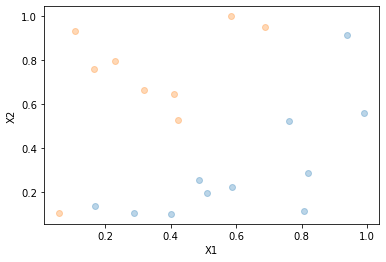

In [6]:
import matplotlib.pyplot as plt
def plotdataset(X,y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y == k],X[:,1][y==k],'o',alpha=0.3)
plotdataset(Xtr,ytr)

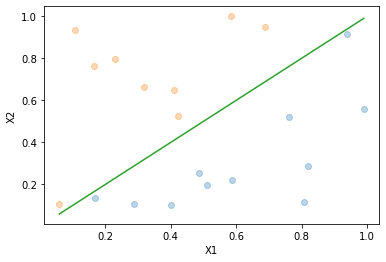

In [8]:
def plothiperplano(X,y,vetor,intercept=0):
    X0min = min(X[:,0])
    X0max = max(X[:,0])
    xs = np.linspace(X0min,X0max,num = 2)
    ys = (-vetor[0]/vetor[1]) * xs-intercept/vetor[1]
    plt.plot(xs,ys)
plotdataset(Xtr,ytr)
plothiperplano(Xtr,ytr,[1,-1])

In [9]:
from sklearn.base import BaseEstimator,ClassifierMixin

0
1
2
3
4
5
6
7
8
9
10
1.0
[ 8.93444464 -8.59556139]


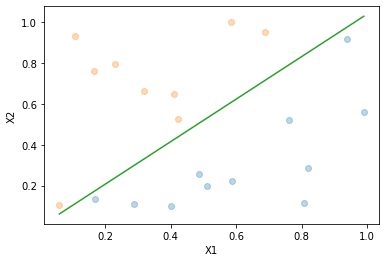

In [32]:
import random

class Perceptron(BaseEstimator,ClassifierMixin):
    
    def __init__(self,max_iter=100):
        self.w = None
        self.activation = lambda a: (a > 0) * 2-1
        self.max_iter = max_iter
        
    def predict(self,X,y=None):
        a = X @ self.w
        np.matmul(X,self.w)
        ypred = self.activation(a)
        return ypred
    
    def fit(self,X,y):
        self.w = np.random.uniform(-1,1,size=X.shape[1])
        indexes = list(range(X.shape[0]))
        #forma online de encontrar os erros
        for j in range(self.max_iter):
            any_error = False
            for i in sorted(indexes,key=lambda k: random.random()):
                x = X[i,:]
                ypred = self.predict(x)
                erro = y[i]-ypred
                if erro != 0:
                    any_error = True
                self.w+=erro * x
            if not any_error:
                break
            print(j)
            
    def fitbach(self,X,y):
        self.w = np.random.uniform(-1,1,size=X.shape[1])
        indexes = list(range(X.shape[0]))
        
        #forma batch de encontrar os erros
        for j in range(self.max_iter):
            ypred = self.predict(X)
            erros = y - ypred
            custo = sum(erros ** 2)
            if custo == 0:
                break
            self.w += X.T @ erros
            print(j)
              
        
perceptron = Perceptron()
#perceptron.fit(Xtr,ytr)
perceptron.fitbach(Xtr,ytr)
ypred = perceptron.predict(Xtr)
print(sum(ypred == ytr)/len(ytr))
print(perceptron.w)
plotdataset(Xtr,ytr)
plothiperplano(Xtr,ytr,perceptron.w)

In [1]:
print('Teste')

Teste
